# Esercizio 4 - Dinamica Molecolare

### Esercizio 4.1

L'algoritmo di Verlet, per calcolare una nuova configurazione spaziale del sistema, ha bisogno di avere le ultime due configurazioni spaziali. Ho implementato il codice in modoche sia possibile salvare queste ultime due configurazioni, una volta eseguita una simulazione.

In assenza del file `old.0`, il sistema crea in modo random la configurazione "precedente". Se invece tale file è presente, il suo contenuto è intepretato come configurazione "precedente". La configurazione "precedente" è riscalata di un opportuno fattore di modo che la temperatura istantanea vada a coincidere con quella settata nel file `input.dat`.

Confrontiamo ora gli effetti dell'implementazione, guardando l'andamento delle osservabili quando la configurazione iniziale è scelta in modo random e quando è "fisica".

__Nota__: nei file `block_obs.dat` e `inst_obs.dat`, le osservabili compaiono nel seguente ordine: energia potenziale, energia cinetica, energia totale, temperatura

In [2]:
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import math
from scipy import log, exp, sqrt


def prog_ave(vec):
    ave = np.zeros(vec.size)
    err = np.zeros(vec.size)
    sum = 0
    sum2 = 0
    
    for i in range(vec.size):
        sum += vec[i]
        sum2 += vec[i]**2
        ave[i] = sum/(i+1)
        
        if i==0:
            err[i]=0
        else:
            err[i] = math.sqrt( (sum2/(i+1) - (sum/(i+1))**2)/i )
    
    return ave, err

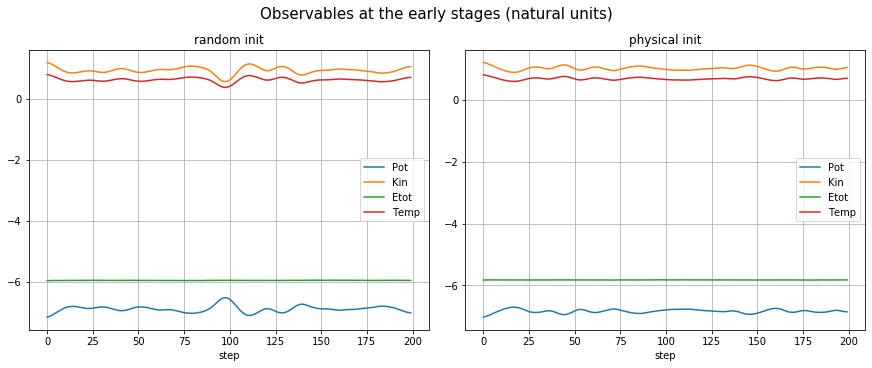

In [3]:
types = ['random', 'physical']
observables = ['Pot', 'Kin', 'Etot', 'Temp']
fig, axs = plt.subplots(1,2, constrained_layout = True, figsize=(12,5))
fig.suptitle('Observables at the early stages (natural units)', fontsize=15)
for i_type, type in enumerate(types):
    data = np.loadtxt('data/' + type + '_init.dat')
    for i_ob, ob in enumerate(observables):
        axs[i_type].plot(data[:,i_ob], label = ob)
        
    axs[i_type].set_title(type + ' init')   
    axs[i_type].set_xlabel('step')   

    axs[i_type].legend()
    axs[i_type].grid()

plt.show()

Osserviamo come l'inizializzazione random presenti delle forti oscillazioni, che sono invece assenti nell'inizializzazione fisica

### Esercizio 04.3

Si riportano i risultati della simulazione, tramite algoritmo di Dinamica Molecolare, di un modello Lennard Jones per l'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

In [4]:
# SI units
sigma = 0.34*10**(-9)
k_b = 1.38065*10**(-23)
eps = 120*k_b
epsonk = 120;

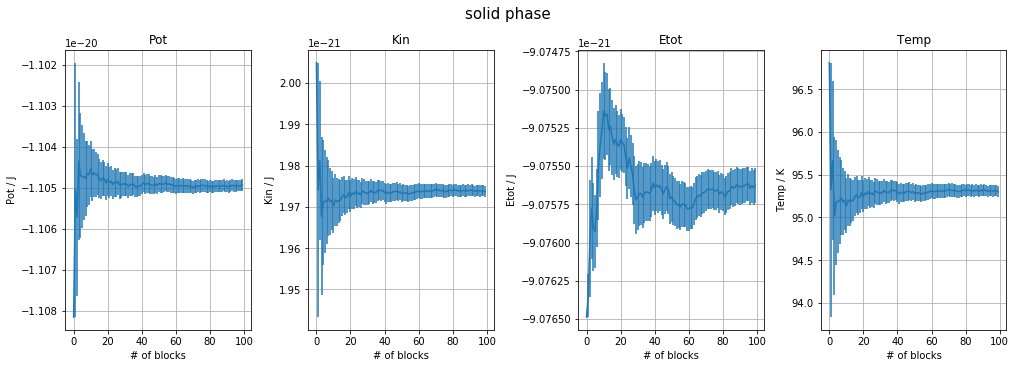

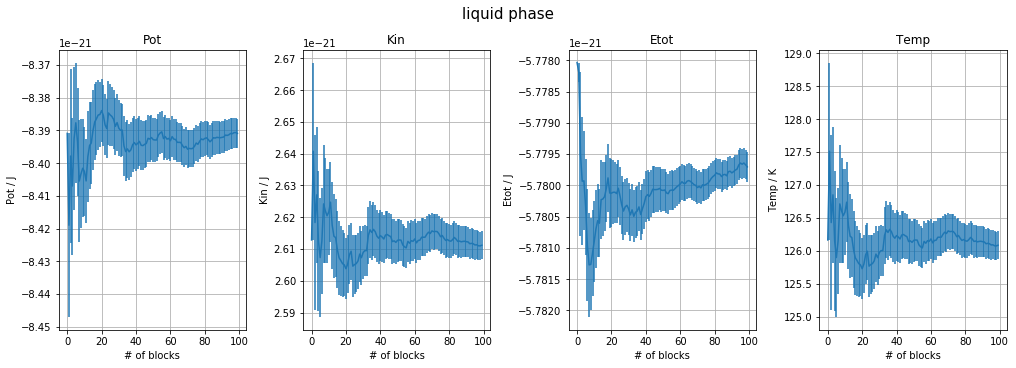

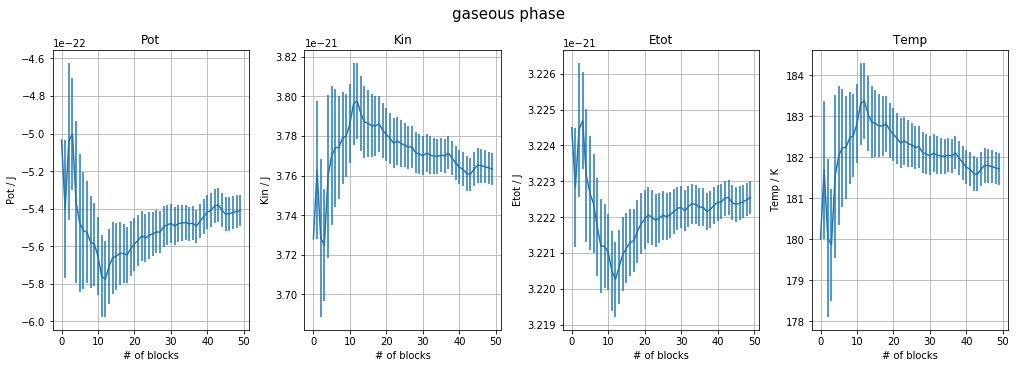

In [5]:
phases = ['solid', 'liquid', 'gaseous']
observables = ['Pot', 'Kin', 'Etot', 'Temp']
unit_meas = [' / J', ' / J', ' / J', ' / K']
for phase in phases:
    fig, axs = plt.subplots(1,4, constrained_layout = True, figsize=(14,5))
    fig.suptitle(phase + ' phase', fontsize=15)
    data = np.loadtxt('data/' + phase + '_obs.dat')
    for i_ob, ob in enumerate(observables):
        if ob == 'Temp':
            data[:,i_ob] = data[:,i_ob] * epsonk
        else:
            data[:,i_ob] = data[:,i_ob] * eps

        value, err = prog_ave(data[:,i_ob])
        steps=np.arange(value.size)
        axs[i_ob].errorbar(steps, value, err)
        axs[i_ob].set_title(ob)
        axs[i_ob].set_xlabel('# of blocks')
        axs[i_ob].set_ylabel(ob + unit_meas[i_ob])
        axs[i_ob].grid()

Si osserva che gli andamenti nella fase solida sono molto più stabili e convergono più velocemente. Questo è dovuto al fatto che la fase è più ordinata e lo spazio delle fasi significativo da esplorare è ridotto.